**Chapter 2: Sales Trends and Seasonality Analysis**

**Analysis Purpose**  
This chapter focuses on the time series aspect, exploring trends and potential opportunities in Walmart sales across different time dimensions through monthly trends, seasonal patterns, weekly and daily sales distributions.

**Analysis Focus**  
- Whether there are stable seasonal peaks (such as holiday months, weekends)  
- Whether there are specific days or time periods with abnormal sales patterns  
- Finding time points from the temporal perspective that can be applied to marketing, operations, or inventory optimization  



In [3]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path

In [4]:
df = pd.read_excel("/Users/wendychu/Desktop/python/walmart ba project/my_env1/data/walmart_time.xlsx")

In [5]:
# Calculate monthly sales
month_sale=df.groupby(pd.Grouper(key="date",freq="M"))["total"].sum().reset_index()
print(type(month_sale))

<class 'pandas.core.frame.DataFrame'>


/var/folders/ch/3q7p7fzx3w92z4v7n4s0n_500000gn/T/ipykernel_2279/2301864824.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_sale=df.groupby(pd.Grouper(key="date",freq="M"))["total"].sum().reset_index()


In [6]:
df.head()
print(month_sale)

         date     total
0  2019-01-31  82440.54
1  2019-02-28  60161.66
2  2019-03-31  69285.00
3  2019-04-30   7578.69
4  2019-05-31  12189.23
5  2019-06-30   9154.50
6  2019-07-31  10953.06
7  2019-08-31  12860.74
8  2019-09-30  13111.70
9  2019-10-31   9395.43
10 2019-11-30   9160.35
11 2019-12-31  11296.48
12 2020-01-31  14414.00
13 2020-02-29  11044.00
14 2020-03-31  10496.00
15 2020-04-30  10275.00
16 2020-05-31  11107.00
17 2020-06-30   9913.00
18 2020-07-31  12110.00
19 2020-08-31  17936.00
20 2020-09-30  17922.00
21 2020-10-31  18133.00
22 2020-11-30  44917.00
23 2020-12-31  42219.00
24 2021-01-31  17160.00
25 2021-02-28  13369.00
26 2021-03-31  12455.00
27 2021-04-30  10084.00
28 2021-05-31  11299.00
29 2021-06-30  12667.00
30 2021-07-31  10949.00
31 2021-08-31  17040.00
32 2021-09-30  19558.00
33 2021-10-31  18805.00
34 2021-11-30  45218.00
35 2021-12-31  46528.00
36 2022-01-31  14424.00
37 2022-02-28  14208.00
38 2022-03-31  11842.00
39 2022-04-30  10569.00
40 2022-05-31  1

***2.1 Monthly Sales Trends***
**Purpose**  
Understand overall changes in Walmart sales across different months, identify whether there are stable seasonal patterns, and help plan promotional and inventory strategies.

**Analysis Content**  
- Use month as the grouping basis to calculate total sales for each month
- Add trend lines to observe the overall direction of change
- Check if specific months consistently represent peaks or troughs

**Key Observations**  
If sales in specific months consistently exceed other months (such as November-December), this may correspond to festivals and shopping seasons. This pattern can be used to schedule marketing activities and replenishment cycles.

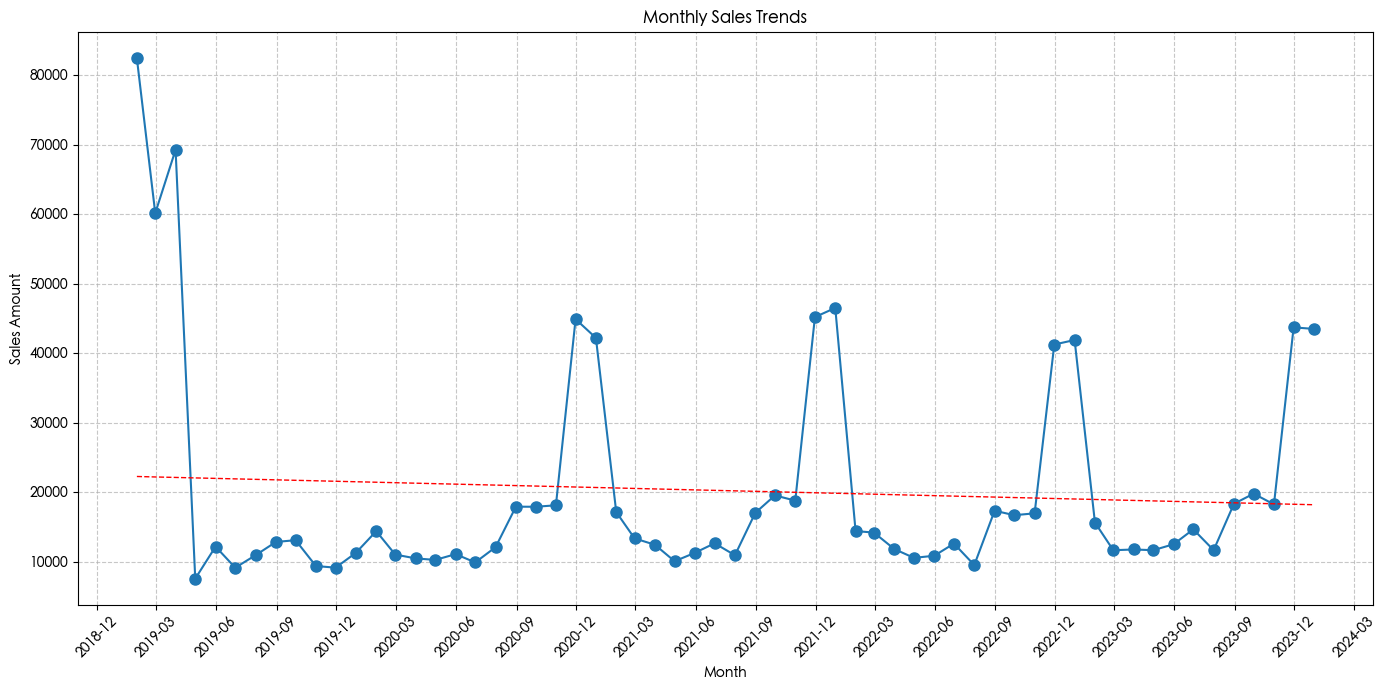

In [7]:

plt.rcParams["font.sans-serif"] = ["Heiti TC"]  # macOS # For normal display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(14,7))
plt.plot(month_sale["date"],month_sale["total"],marker='o',markersize=8)
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.grid(True, linestyle='--', alpha=0.7)

# Label settings
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.rcParams["font.sans-serif"] = ["Heiti TC"]  # macOS # For normal display of Chinese labels
plt.rcParams['axes.unicode_minus'] = False 

# Trend line calculation
z=np.polyfit(range(len(month_sale)),month_sale["total"],1)
p=np.poly1d(z)
plt.plot(month_sale["date"],p(range(len(month_sale))),"r--", linewidth=1)
plt.tight_layout()
plt.savefig('Monthly_Sales_Trends.png', dpi=300)

***2.2 Seasonal Pattern Analysis***

**Purpose**  
Observe sales changes across different years and months to confirm whether predictable seasonal patterns exist, helping to formulate annual marketing and inventory plans.

**Analysis Method**  
- Construct a year-month cross heatmap, with months as rows and years as columns  
- Each cell represents the total sales for that month in that year  
- Quickly identify high and low sales months through color depth, finding periodic peaks or anomalies

**Key Observations**  
- Are November-December consistently high sales months every year?  
- Are there fractures or anomalies in annual sales trends during specific months?  
- Are there potential "stable troughs" where special activities or promotional plans could be introduced?

In [8]:
# Regroup by year and month
year_month_sale=df.groupby(["year","month"])["total"].sum().reset_index()
year_month_pivot =year_month_sale.pivot_table(index="month",columns="year",values="total")

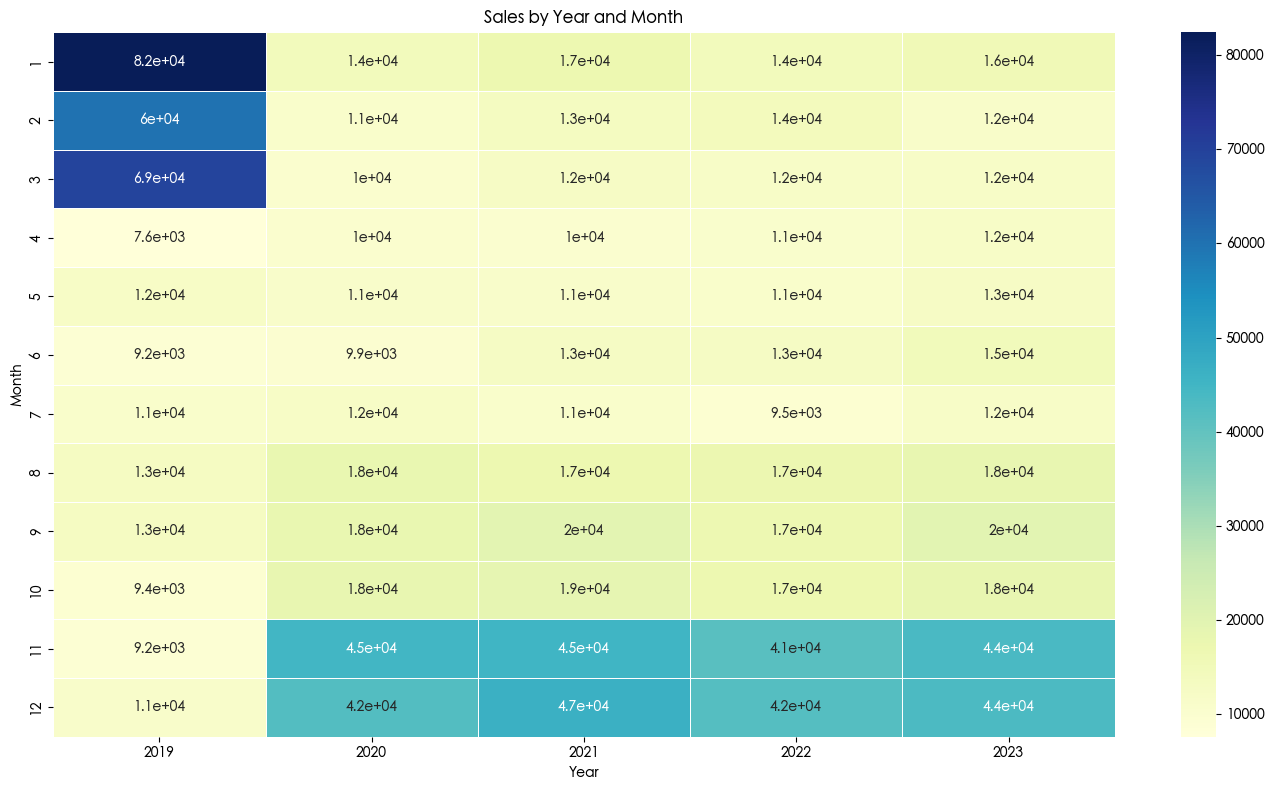

In [9]:
# Visualize year-month comparison
plt.figure(figsize=(14,8))

# Heatmap to show sales comparison
sns.heatmap(data=year_month_pivot,annot=True,cmap='YlGnBu', linewidths=.5)
plt.title("Sales by Year and Month")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("Year_Month_Heatmap")

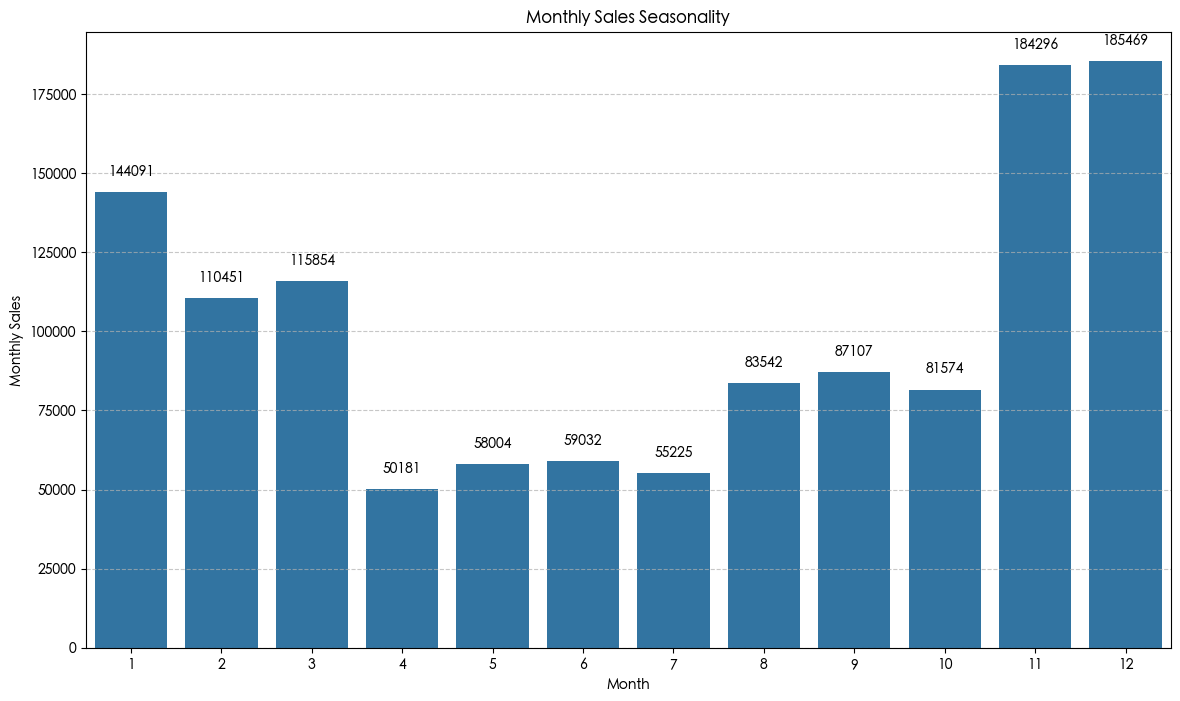

In [10]:
## Visualize monthly sales seasonality comparison (without breakdown by year)
plt.figure(figsize=(14,8))

# Calculate monthly sales
only_month_sale=df.groupby(["month"])["total"].sum().reset_index()


# Chart creation
sns.barplot(x="month",y="total",data=only_month_sale)
plt.title("Monthly Sales Seasonality")
plt.xlabel("Month")
plt.ylabel("Monthly Sales")
plt.grid(True,axis='y',linestyle='--', alpha=0.7)
# Insert labels
for i ,v in enumerate(only_month_sale["total"]) :
    plt.text(i,v+5000,f"{v:.0f}",ha='center')

plt.tight_layout
plt.savefig('Monthly_Seasonality_Analysis', dpi=300)



              total
date               
2019-09-03  7118.14
2019-07-02  6884.01
2019-03-14  6871.08
2019-02-15  6505.51
2019-02-03  6247.91


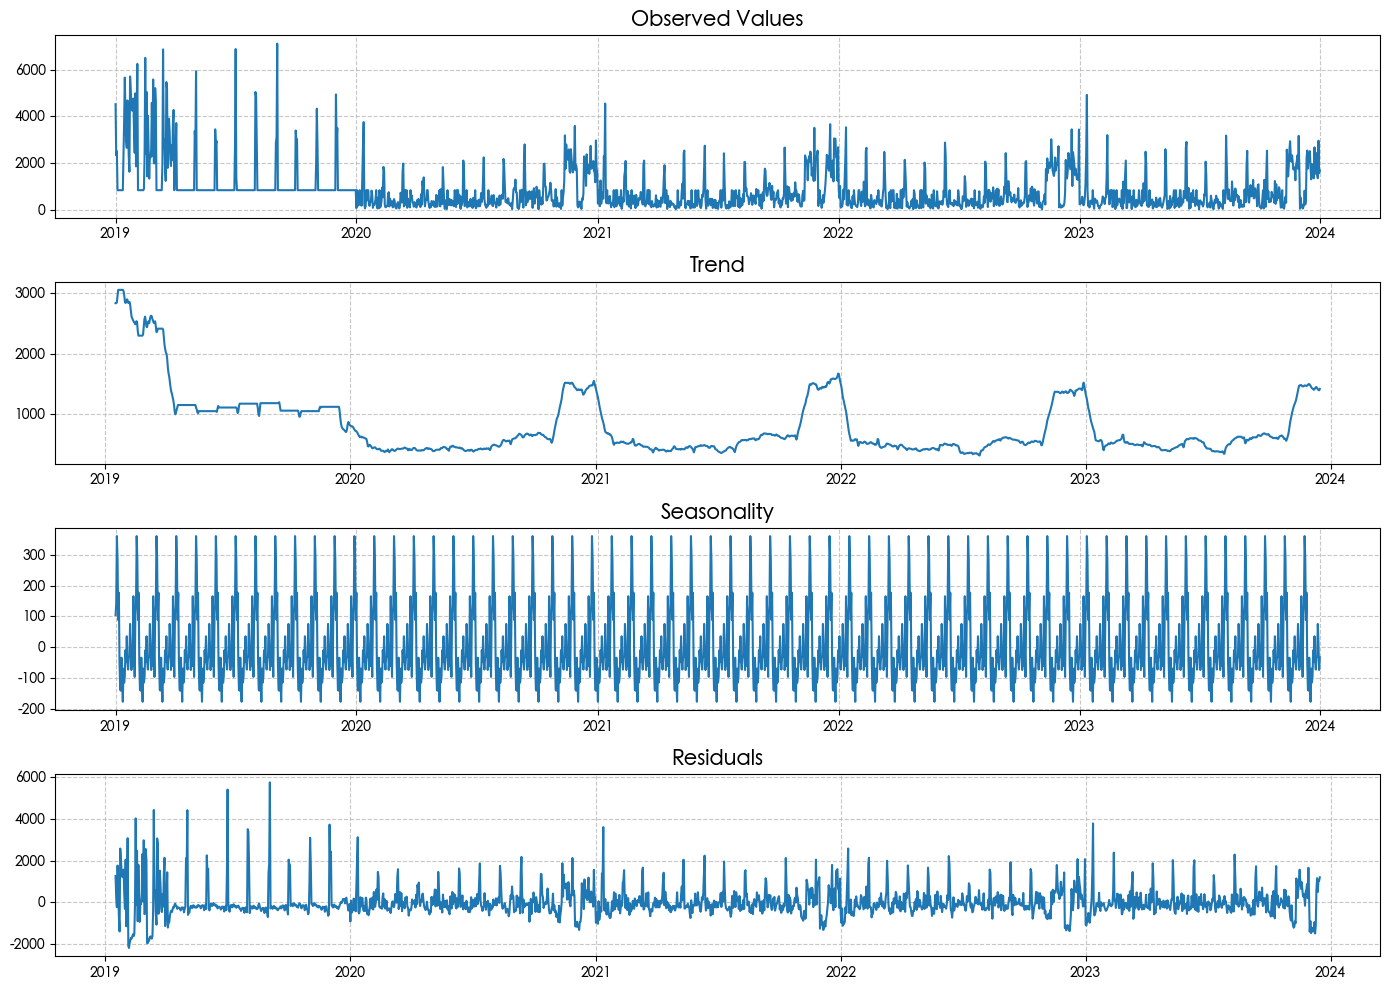

In [11]:
# Use time series analysis to more clearly understand trends and seasonality

# First calculate daily sales
daily_sale=df.groupby("date")["total"].sum().reset_index()
daily_sale=daily_sale.sort_values(by="total",ascending=False)
daily_sale.set_index('date', inplace=True)
print(daily_sale.head())


# Find and fill missing dates
full_date_sale=pd.date_range(start=daily_sale.index.min(),end=daily_sale.index.max())
daily_sale_filled=daily_sale.reindex(full_date_sale).fillna(daily_sale.mean())

# Use time series decomposition
decomposition = seasonal_decompose(daily_sale_filled,model="additive",period=30)

# Visualize analysis results
plt.figure(figsize=(14,10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed Values', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Time_Series_Analysis")

***2.3 Weekly and Daily Sales Analysis***

**Purpose**  
Explore sales pattern changes across the seven days of the week and 24 hours of the day, understand the time distribution of customer consumption behavior, and assist in staffing, promotional timing, and operational optimization.

**Method**  
- Analyze sales and transactions on different days of the week to observe which day is most active  
- Analyze sales at different hours to map daily peaks and troughs  
- Compare differences between "number of transactions" and "total sales" to determine if there are periods of high traffic but low average transaction value

**Key Observations**  
- Which days of the week have the most transactions? Are these days also the highest in sales?  
- Which time periods during the day have the most frequent transactions? Are there peaks during lunch breaks/after work?  
- Are there periods with "high transaction volume but low average transaction value"? This represents purchases concentrated in small, quick transactions


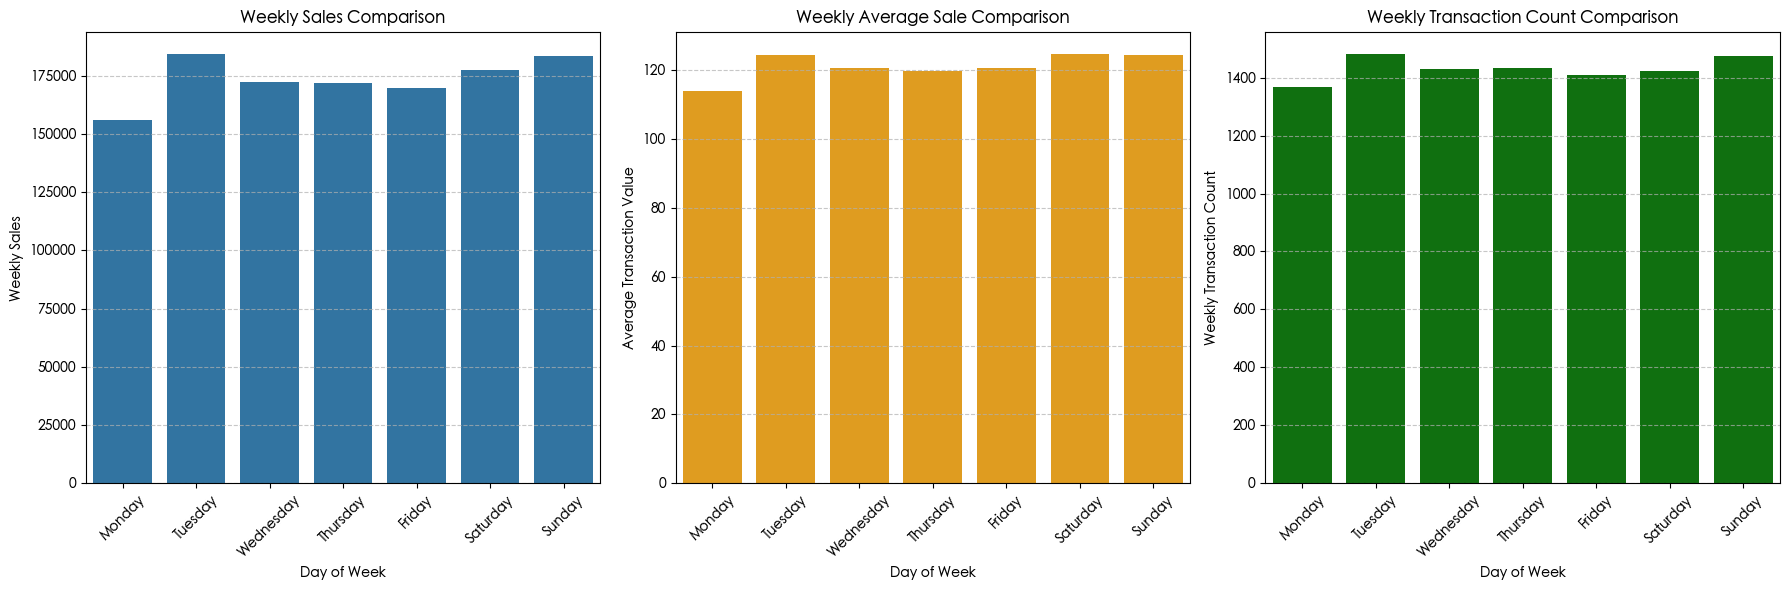

In [12]:
# Calculate weekly sales/weekly average sales/weekly transaction count
weekday_sale=df.groupby(["weekday","weekday_name"])["total"].sum().reset_index()
weekday_avg=df.groupby(["weekday","weekday_name"])["total"].mean().reset_index()
weekday_transc_count=df.groupby(["weekday","weekday_name"]).size().reset_index()

weekday_transc_count.columns=["weekday","weekday_name","transaction_counts"]
weekday_avg.columns=["weekday","weekday_name","avg_sale"]
weekday_sale.columns=["weekday","weekday_name","total_sale"]

# Merge data
weekday_analysis=pd.merge(weekday_sale,weekday_avg,on=['weekday', 'weekday_name'])
weekday_analysis=pd.merge(weekday_analysis,weekday_transc_count,on=['weekday', 'weekday_name'])
weekday_analysis.sort_values('weekday', inplace=True)

# Visualize charts
    # Weekly sales comparison
plt.figure(figsize=(18,6))
plt.subplot(131)
sns.barplot(x="weekday_name",y="total_sale",data=weekday_analysis)
plt.title("Weekly Sales Comparison")
plt.xlabel("Day of Week")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Average transaction value comparison
plt.subplot(132)
sns.barplot(x="weekday_name",y="avg_sale",data=weekday_analysis,color="orange")
plt.title("Weekly Average Sale Comparison")
plt.xlabel("Day of Week")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Weekly transaction count comparison
plt.subplot(133)
sns.barplot(x="weekday_name",y="transaction_counts",data=weekday_analysis,color="green")
plt.title("Weekly Transaction Count Comparison")
plt.xlabel("Day of Week")
plt.ylabel("Weekly Transaction Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Weekly_Sales_Analysis.png', dpi=300)



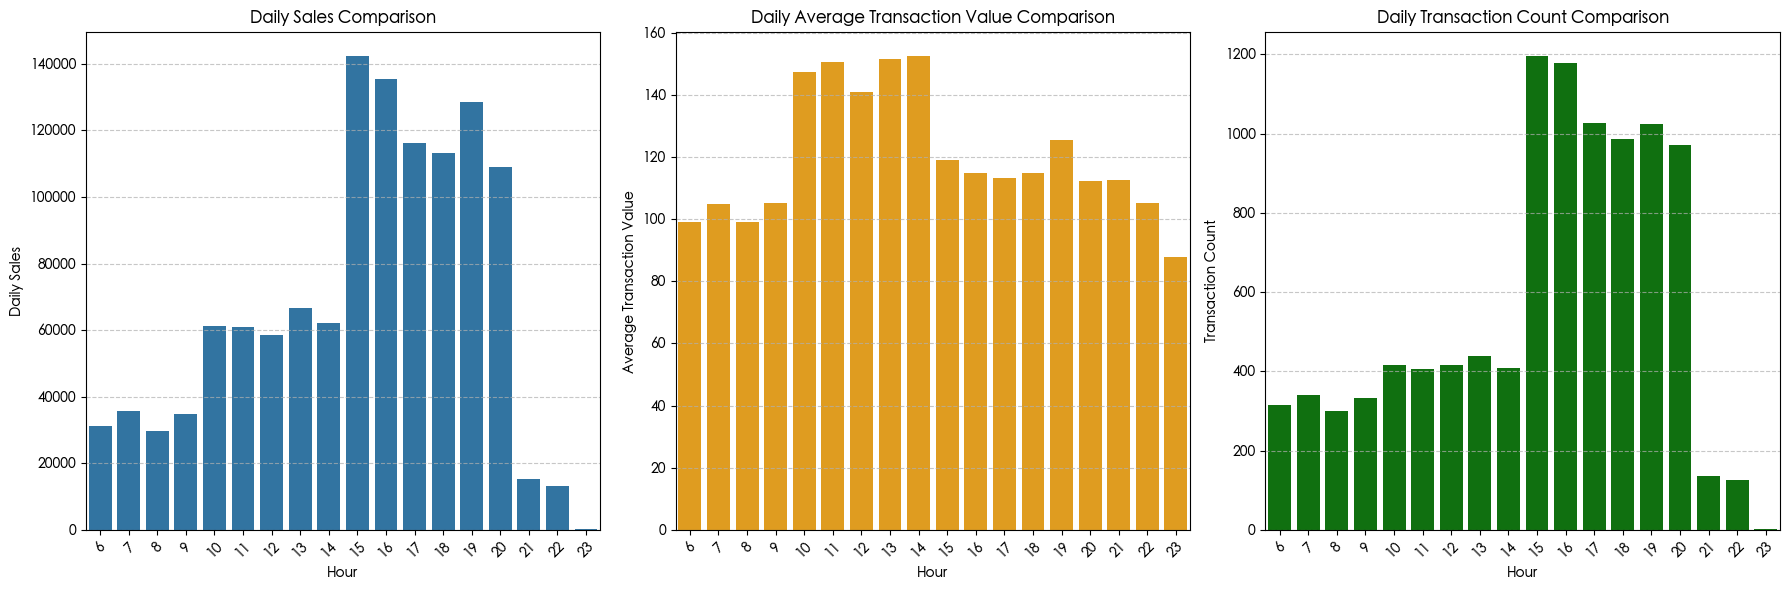

In [13]:
# Daily sales calculation by hour
hour_sale=df.groupby("hour")["total"].sum().reset_index()
hour_count=df.groupby("hour")["total"].size().reset_index()
hour_count.columns=["hour","transcation_count"]
# Merge charts
daily_hour_analysis=pd.merge(hour_sale,hour_count,on=['hour'])
daily_hour_analysis["avg_sale"]=daily_hour_analysis["total"]/daily_hour_analysis["transcation_count"]
# Visualize charts
 # Daily sales comparison
plt.figure(figsize=(18,6))
plt.subplot(131)
sns.barplot(x="hour",y="total",data=daily_hour_analysis)
plt.title("Daily Sales Comparison")
plt.xlabel("Hour")
plt.ylabel("Daily Sales")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Average transaction value comparison
plt.subplot(132)
sns.barplot(x="hour",y="avg_sale",data=daily_hour_analysis,color="orange")
plt.title("Daily Average Transaction Value Comparison")
plt.xlabel("Hour")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Daily transaction count comparison
plt.subplot(133)
sns.barplot(x="hour",y="transcation_count",data=daily_hour_analysis,color="green")
plt.title("Daily Transaction Count Comparison")
plt.xlabel("Hour")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()




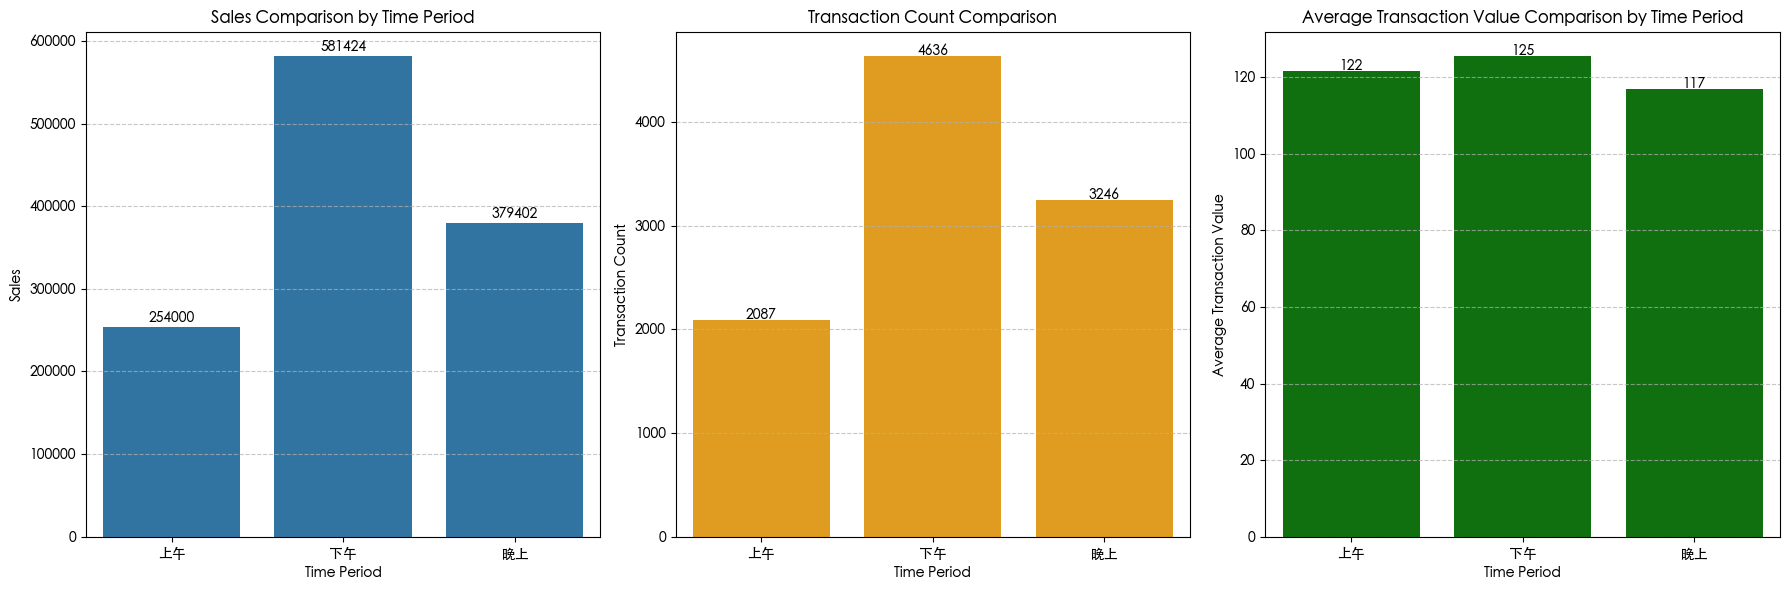

In [14]:
# Sales calculation by time period
period_sale=df.groupby("time_period").agg({
    "total":"sum","invoice_id":"nunique","quantity":"sum"}).reset_index()
period_sale["avg_sale"]=period_sale["total"]/period_sale["invoice_id"]
period_sale['avg_quantity'] =period_sale['quantity'] / period_sale['invoice_id']

# Visualize charts
plt.figure(figsize=(18, 6))
 # Transaction count comparison
plt.subplot(131)
sns.barplot(x="time_period",y="total",data=period_sale)
plt.title("Sales Comparison by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Sales")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(period_sale['total']):
    plt.text(i, v + 5000, f'{v:.0f}', ha='center')

    # Average transaction value comparison
plt.subplot(132)
sns.barplot(x="time_period",y="invoice_id",data=period_sale,color="orange")
plt.title("Transaction Count Comparison")
plt.xlabel("Time Period")
plt.ylabel("Transaction Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(period_sale['invoice_id']):
    plt.text(i, v, f'{v:.0f}', ha='center')

    # Time period average transaction value comparison
plt.subplot(133)
sns.barplot(x="time_period",y="avg_sale",data=period_sale,color="green")
plt.title("Average Transaction Value Comparison by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Average Transaction Value")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(period_sale['avg_sale']):
    plt.text(i, v , f'{v:.0f}', ha='center')
plt.tight_layout()
plt.savefig('Time_Period_Analysis.png', dpi=300)


1727

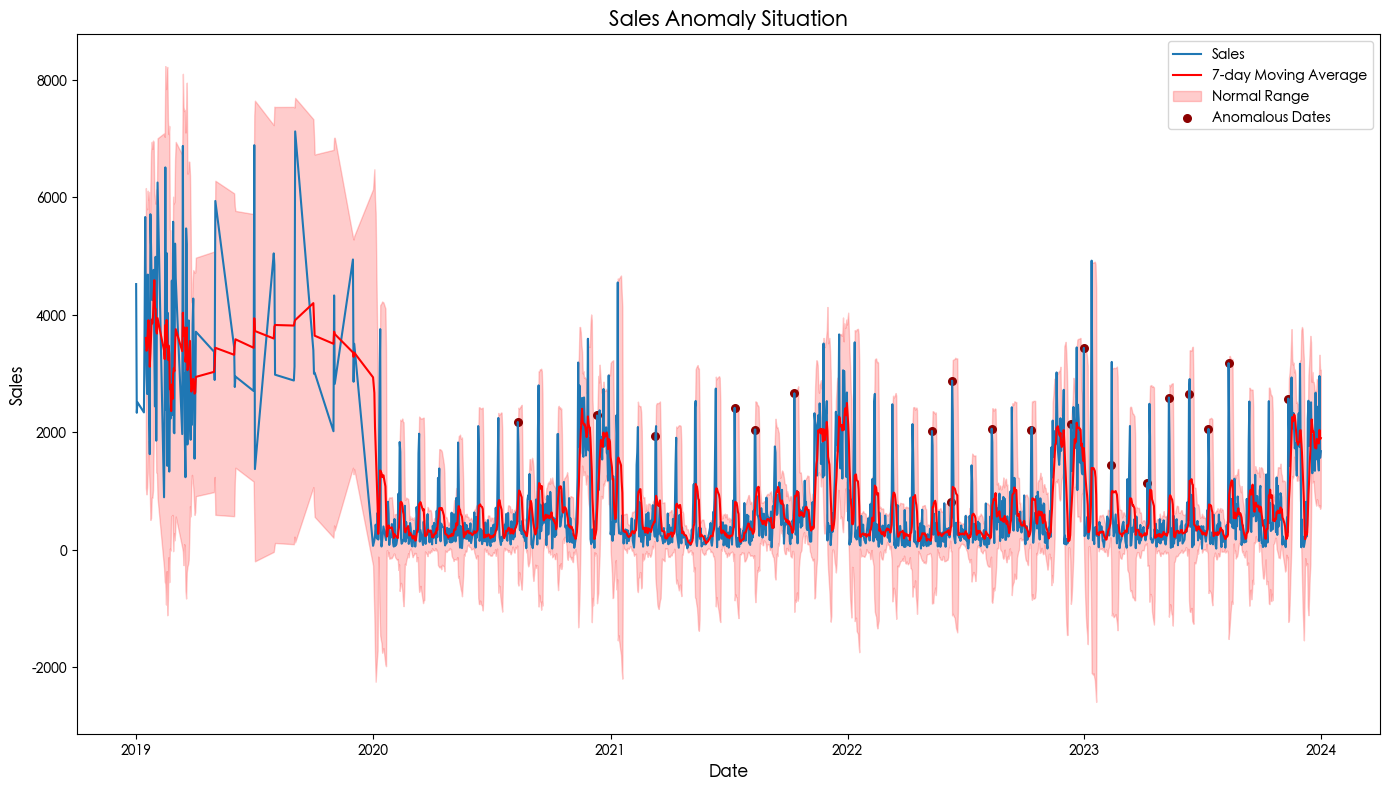

In [15]:
# Filter anomalies
daily_sale = daily_sale.sort_index()
daily_sale['MA7']=daily_sale["total"].rolling(window=7).mean()
daily_sale['std7']=daily_sale["total"].rolling(window=7).std()


# Determine upper and lower bounds
daily_sale['upper_bound']=daily_sale['MA7']+2*daily_sale['std7']
daily_sale['lower_bound']=daily_sale['MA7']-2*daily_sale['std7']

# Check if values are anomalous (top 20 anomalous points)
daily_sale["not_normal"]=(daily_sale["total"]>daily_sale['upper_bound'])|(daily_sale["total"]<daily_sale['lower_bound'])
daily_sale['score'] = ((daily_sale['total'] - daily_sale['MA7']).abs() / daily_sale['std7']
).round(2)
top_score = daily_sale.sort_values('score', ascending=False).head(20)


# Visualize normal range
plt.figure(figsize=(14,8))
plt.plot(daily_sale.index,daily_sale["total"],label='Sales')
plt.plot(daily_sale.index,daily_sale["MA7"],label='7-day Moving Average',color="red")
plt.fill_between(daily_sale.index,daily_sale['upper_bound'],daily_sale['lower_bound'],alpha=0.2, color='red', label='Normal Range')
# Mark anomalous points
plt.scatter(top_score.index,top_score["total"],color='darkred', label='Anomalous Dates', s=30)
plt.title('Sales Anomaly Situation', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('Sales_Anomaly_Situation.png', dpi=300)

# Text report
top_score_sort=top_score.sort_values("date")
report=[]
report.append("Top 20 Anomalies Text Report\n")
for i ,row in top_score_sort.iterrows() :
    std_score=row["score"]
    direction  = "higher than" if row['total'] > row['MA7'] else "lower than"
    line=f"Date: {i.strftime('%Y-%m-%d')}, Sales: {row["total"]:.0f}, {direction} 7-day average by {std_score} standard deviations"
    report.append(line)

# Combine all text into one long paragraph
report_text = "\n".join(report)

# Output as text file with .txt extension
Path("Top20_Anomalies_Text_Report.txt").write_text(report_text, encoding="utf-8-sig")
    







In [ ]:
print(report_text)

